# <font face="楷体">PB-ROE研究，行业对比及数据分析</font>

 
#### <font face="楷体">选取每年年报的财务ROE与次年4月30日的PB。为了防止极端数据影响，剔除ROE大于50或小于-50的点，以及PB大于50或小于0个股。</font>

1. <font face="楷体">按年度统计，过去20年，全部A股的PB-ROE线性拟合相关系数、斜率、截距。</font>

2. <font face="楷体">统计过去20年，全部A股不同行业（中信一级）的PB-ROE相关系数、线性拟合斜率、截距，20年的中值对比一遍，20年的总数据对比一遍。</font>

3. <font face="楷体">按年度统计，过去20年，基础化工、石油石化行业的PB-ROE线性拟合相关系数、斜率和截距。</font>

In [1]:
# author: Showhandss
# daily: 2022.10.24
# where: Hong Kong
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import warnings
# 去除warnings
warnings.filterwarnings('ignore')
# 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("all_A_ROE-PB.csv")
df

,代码,名称,中信行业,2000/12/31,2001/12/31,2002/12/31,2003/12/31,2004/12/31,2005/12/31,2006/12/31,...,2013/4/30,2014/4/30,2015/4/30,2016/4/30,2017/4/30,2018/4/30,2019/4/30,2020/4/30,2021/4/30,2022/4/30
0,000001.SZ,平安银行,银行,10.7,11.1,11.5,7.2,6.2,6.2,20.1,...,1.1,0.9,1.7,0.9,0.8,0.9,1.0,1.0,1.5,0.9
1,000002.SZ,万科A,房地产,10.4,12.0,11.3,11.5,14.2,16.3,15.4,...,1.9,1.2,1.8,2.7,1.9,2.3,2.0,1.6,1.4,1.0
2,000004.SZ,ST国华,医药,24.7,11.6,5.7,3.9,-4.3,-16.1,0.9,...,11.4,15.4,27.1,39.1,25.3,13.3,18.5,3.3,1.8,1.3
3,000005.SZ,ST星源,电力及公用事业,0.1,-6.2,-8.6,0.2,0.2,-27.3,-9.2,...,3.5,3.4,5.7,6.6,4.8,2.8,2.4,1.8,1.9,1.4
4,000006.SZ,深振业A,房地产,10.5,9.6,-0.7,-20.2,6.4,10.2,14.7,...,1.6,1.6,3.6,2.4,2.2,1.6,1.3,1.0,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,900907.SH,退市鹏B(退市),有色金属,11.4,13.8,12.4,6.0,-145.3,NaN,-15.5,...,2.5,2.4,1.6,1.7,2.4,1.3,4.3,2.7,NaN,NaN
5101,900919.SH,退市庭B(退市),综合金融,0.8,-17.3,-42.2,5.9,-56.3,-129.2,9.9,...,3.4,4.0,3.1,4.3,3.8,3.7,2.8,2.3,0.9,0.5
5102,900930.SH,*ST沪普B(退市),通信,5.1,10.6,5.3,7.9,1.0,0.5,20.1,...,1.0,1.2,2.8,3.6,2.8,1.6,NaN,NaN,NaN,NaN
5103,900933.SH,华新B股(退市),建材,2.3,3.1,4.0,8.5,12.7,5.1,11.2,...,1.3,1.0,1.2,0.7,0.8,1.0,1.7,1.2,1.2,NaN


In [3]:
# 查看数据格式
df.info()
# 很多数据明明是float却被识别为object，原因在于excel自动给很多数据加了逗号，所以后面需要去除这些数字中的逗号。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代码          5105 non-null   object 
 1   名称          5105 non-null   object 
 2   中信行业        5105 non-null   object 
 3   2000/12/31  1246 non-null   object 
 4   2001/12/31  1343 non-null   object 
 5   2002/12/31  1384 non-null   object 
 6   2003/12/31  1477 non-null   object 
 7   2004/12/31  1604 non-null   object 
 8   2005/12/31  1685 non-null   object 
 9   2006/12/31  1901 non-null   object 
 10  2007/12/31  2262 non-null   object 
 11  2008/12/31  2553 non-null   object 
 12  2009/12/31  2688 non-null   object 
 13  2010/12/31  2708 non-null   object 
 14  2011/12/31  3262 non-null   object 
 15  2012/12/31  3630 non-null   object 
 16  2013/12/31  4052 non-null   object 
 17  2014/12/31  4258 non-null   object 
 18  2015/12/31  4328 non-null   object 
 19  2016/12/31  4591 non-null  

In [4]:
# 获取 ROE & PB 标头
names = [column for column in df]
names = names[3:]
ROE = names[1:22]
PB = names[24:]
print(ROE)
print(PB)

['2001/12/31', '2002/12/31', '2003/12/31', '2004/12/31', '2005/12/31', '2006/12/31', '2007/12/31', '2008/12/31', '2009/12/31', '2010/12/31', '2011/12/31', '2012/12/31', '2013/12/31', '2014/12/31', '2015/12/31', '2016/12/31', '2017/12/31', '2018/12/31', '2019/12/31', '2020/12/31', '2021/12/31']
['2002/4/30', '2003/4/30', '2004/4/30', '2005/4/30', '2006/4/30', '2007/4/30', '2008/4/30', '2009/4/30', '2010/4/30', '2011/4/30', '2012/4/30', '2013/4/30', '2014/4/30', '2015/4/30', '2016/4/30', '2017/4/30', '2018/4/30', '2019/4/30', '2020/4/30', '2021/4/30', '2022/4/30']


In [5]:
# 直接遍历，挨个进行对比PB是否符合要求
DropList = []
for Rname, Pname in zip(ROE, PB):
    RList = df[Rname]
    PList = df[Pname]
    
    for Rele, Pele, index in zip(RList, PList,range(0,5105)):
        if type(Pele) == type('Aa'):
            # 处理str
            #print('str', index)
            Pele = float(Pele.replace(',', ''))
            # print(Pele,index)
        if Pele > 50 or Pele < 0:
            DropList.append(index)
# 获得非重复列表
DropList = set(DropList)

In [6]:
# 过滤完PB后的数据
df_ = df.drop(DropList)
df_

,代码,名称,中信行业,2000/12/31,2001/12/31,2002/12/31,2003/12/31,2004/12/31,2005/12/31,2006/12/31,...,2013/4/30,2014/4/30,2015/4/30,2016/4/30,2017/4/30,2018/4/30,2019/4/30,2020/4/30,2021/4/30,2022/4/30
0,000001.SZ,平安银行,银行,10.7,11.1,11.5,7.2,6.2,6.2,20.1,...,1.1,0.9,1.7,0.9,0.8,0.9,1.0,1.0,1.5,0.9
1,000002.SZ,万科A,房地产,10.4,12.0,11.3,11.5,14.2,16.3,15.4,...,1.9,1.2,1.8,2.7,1.9,2.3,2.0,1.6,1.4,1.0
2,000004.SZ,ST国华,医药,24.7,11.6,5.7,3.9,-4.3,-16.1,0.9,...,11.4,15.4,27.1,39.1,25.3,13.3,18.5,3.3,1.8,1.3
3,000005.SZ,ST星源,电力及公用事业,0.1,-6.2,-8.6,0.2,0.2,-27.3,-9.2,...,3.5,3.4,5.7,6.6,4.8,2.8,2.4,1.8,1.9,1.4
4,000006.SZ,深振业A,房地产,10.5,9.6,-0.7,-20.2,6.4,10.2,14.7,...,1.6,1.6,3.6,2.4,2.2,1.6,1.3,1.0,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,873223.BJ,荣亿精密,机械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,5.2
5101,900919.SH,退市庭B(退市),综合金融,0.8,-17.3,-42.2,5.9,-56.3,-129.2,9.9,...,3.4,4.0,3.1,4.3,3.8,3.7,2.8,2.3,0.9,0.5
5102,900930.SH,*ST沪普B(退市),通信,5.1,10.6,5.3,7.9,1.0,0.5,20.1,...,1.0,1.2,2.8,3.6,2.8,1.6,NaN,NaN,NaN,NaN
5103,900933.SH,华新B股(退市),建材,2.3,3.1,4.0,8.5,12.7,5.1,11.2,...,1.3,1.0,1.2,0.7,0.8,1.0,1.7,1.2,1.2,NaN


In [7]:
# 绘制多柱状图
def Multiple_column_figure(dictionary: dict, title = ''):
    Subs = [] # 下标名字
    RR = []  # 相关系数
    AA = []  # 斜率
    BB = []  # 截距
    for key1 in dictionary:
        Subs.append(key1)
        Temp = []
        for key2 in dictionary[key1]:
            Temp.append(dictionary[key1][key2])
        RR.append(Temp[0])
        AA.append(Temp[1])
        BB.append(Temp[2])
    
    plt.figure(1)
    plt.figure(figsize=(60, 15), dpi=130)
    axRR = plt.subplot(211)
    axRR.bar(range(len(Subs)), RR, color='red',tick_label = Subs)
    axRR.set_title('线性拟合相关系数', fontsize = 20)
    axAA = plt.subplot(223)
    axAA.bar(range(len(Subs)), AA, color='blue',tick_label = Subs)
    axAA.set_title('斜率', fontsize = 20)
    axBB = plt.subplot(224)
    axBB.bar(range(len(Subs)), BB, color='green',tick_label = Subs)
    axBB.set_title('截距', fontsize = 20)
    plt.suptitle(title, fontsize = 40)

### <font face="楷体">1. 按年度统计，过去20年，全部A股的PB-ROE线性拟合相关系数、斜率、截距。</font>

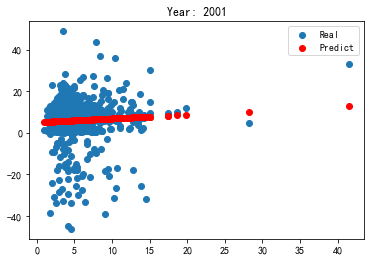

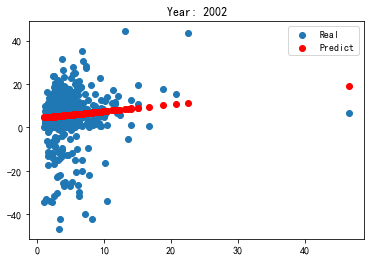

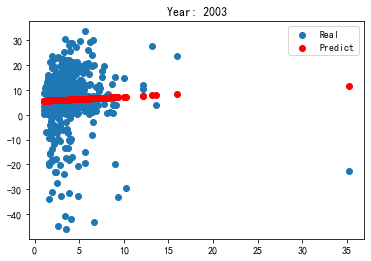

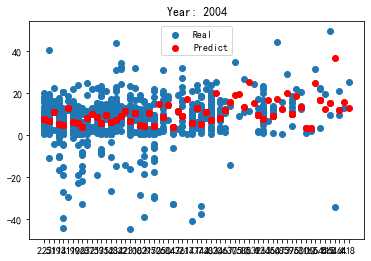

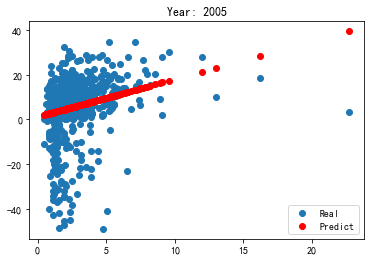

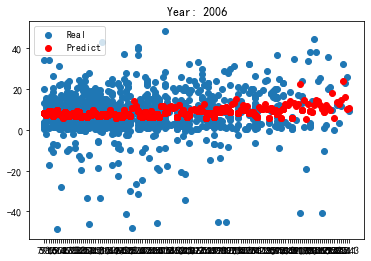

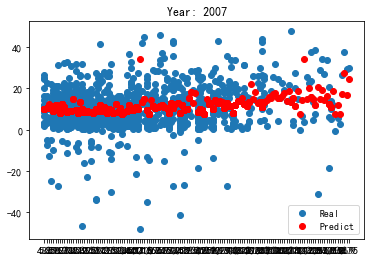

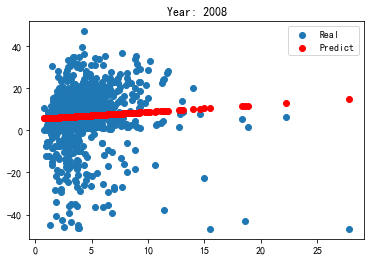

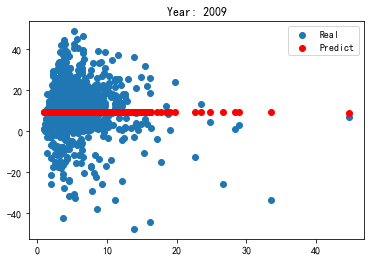

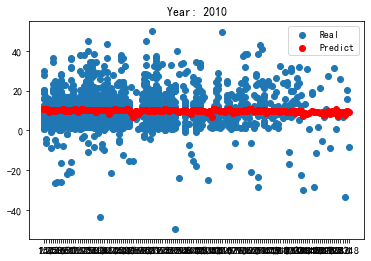

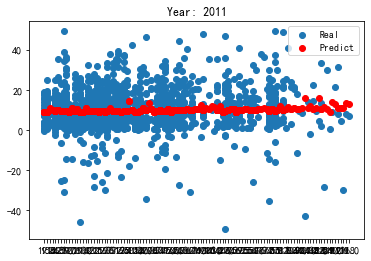

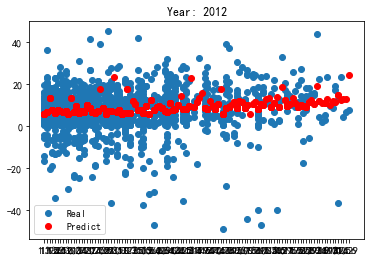

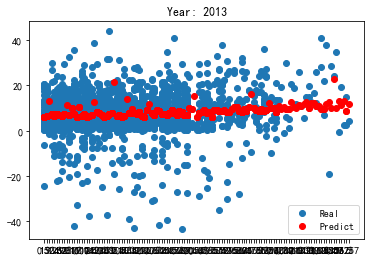

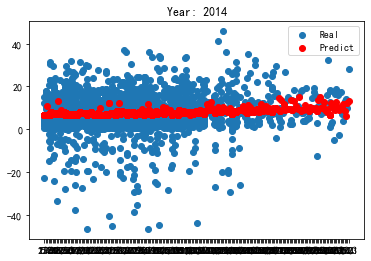

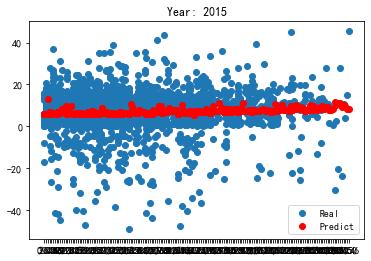

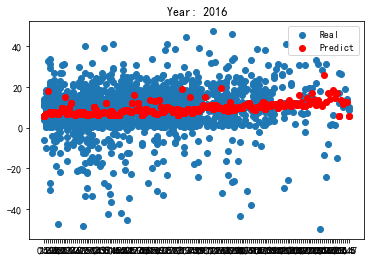

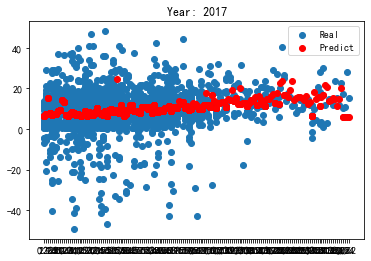

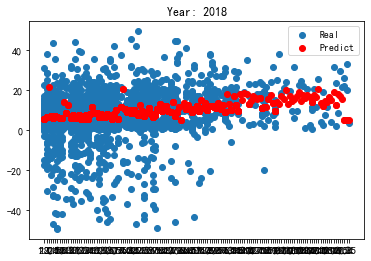

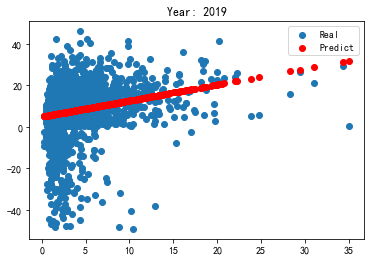

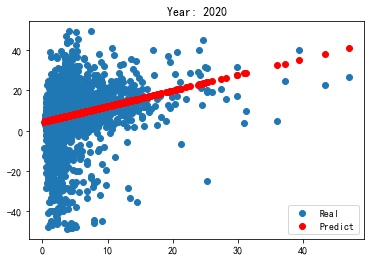

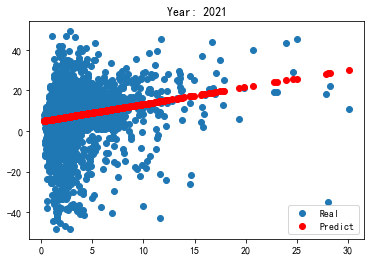

In [8]:
# plt.figure(1)
# plt.figure(figsize=(60, 15), dpi=80)
# n = 1
# 过滤ROE同时计算出 线性拟合相关系数、斜率、截距
RESULT = {}
for Rname, Pname in zip(ROE,PB):
    RList = df_[Rname]
    PList = df_[Pname]
    Year = Rname[:4]
    RTemp = []
    PTemp = []
    
    for Rele,Pele in zip(RList,PList):
        if type(Rele) == type('Aa'):
            # 处理str
            Rele = float(Rele.replace(',', ''))
        if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
            RTemp.append(Rele)
            PTemp.append(Pele)              
    
    ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
    PB_train = np.array(PTemp).reshape((len(PTemp), 1))

    #新建一个线性回归模型，并把数据放进去对模型进行训练
    lineModel = LinearRegression()
    lineModel.fit(PB_train, ROE_train)
    
    #用训练后的模型，进行预测
    ROE_predict = lineModel.predict(PB_train)
    
    #coef_是系数，intercept_是截距
    a1 = lineModel.coef_[0][0]
    b = lineModel.intercept_[0]
    # print("y=%.4f*x+%.4f" % (a1,b))
    R2 = lineModel.score(PB_train, ROE_train)
    #pccs = np.corrcoef(ROE_train, PB_train)
    # print("correlation coefficient: %.4f"%(R2))
    TEMP = {"R2":R2,
            "Slope": a1,
            "Intercept": b}
    RESULT[Year] = TEMP
    
    x = PTemp
    y = RTemp
    
#    axTemp.bar(range(len(Subs)), RR, color='red',tick_label = Subs)
#     plt.subplot(2, 10, n)
#     n = n + 1
#     plt.scatter(x, y, label='Real') # 散点图
#     plt.scatter(x, ROE_predict, color = 'red', label='Predict')
#     plt.title("Year: %s"% Year)
#     plt.legend() # 显示图例，即每条线对应 label 中的内容
#     plt.show() # 显示图形
    plt.scatter(x, y, label='Real') # 散点图
    plt.scatter(x, ROE_predict, color = 'red', label='Predict')
    plt.title("Year: %s"% Year)
    plt.legend() # 显示图例，即每条线对应 label 中的内容
    plt.show() # 显示图形

<Figure size 432x288 with 0 Axes>

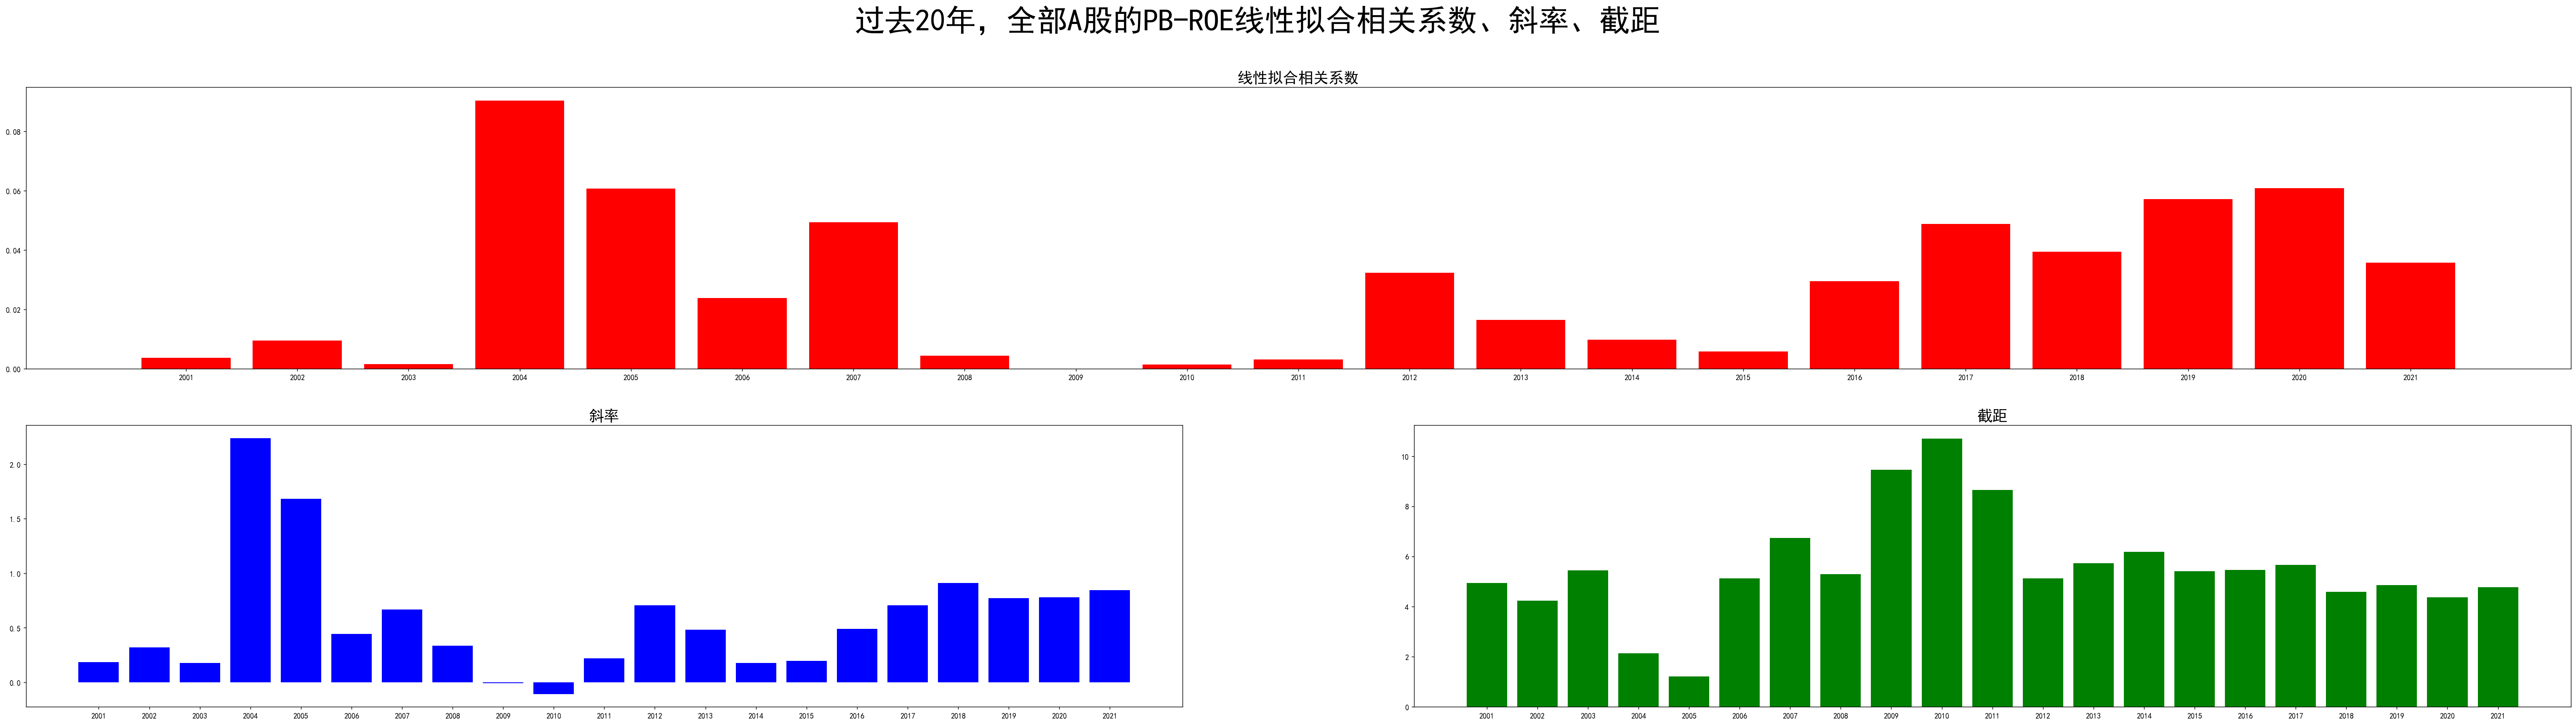

In [9]:
# R_R_ = pd.DataFrame(RESULT).T
# print(R_R_)
# R_R_.to_csv(path_or_buf='D:\JUPYTER_DEMO\ROE-PB\RESULT_1.csv')

Multiple_column_figure(RESULT,"过去20年，全部A股的PB-ROE线性拟合相关系数、斜率、截距")

### <font face="楷体">2. 统计过去20年，全部A股不同行业（中信一级）的PB-ROE相关系数、线性拟合斜率、截距，20年的中值对比一遍，20年的总数据对比一遍</font>

- <font face="楷体">20年总数据对比: 这个是20年的数据放在一起，统计一遍；</font>
- <font face="楷体">20年的中值对比: 统计20次之后，选出这20次的中值。</font>

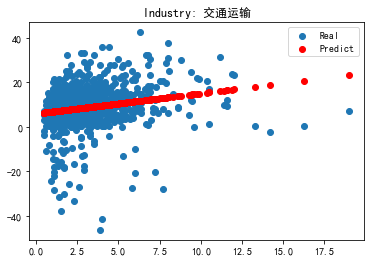

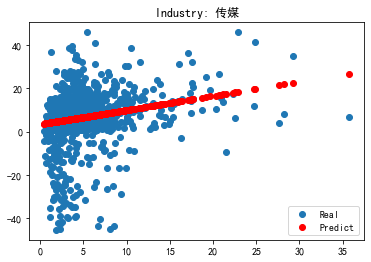

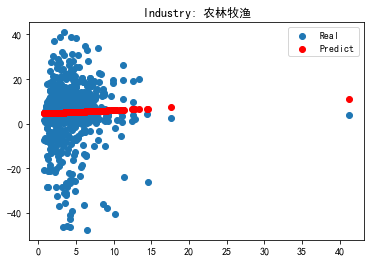

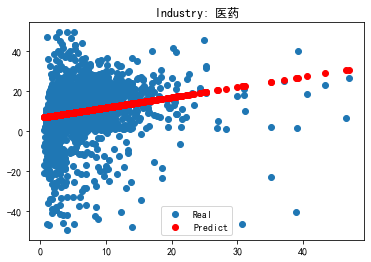

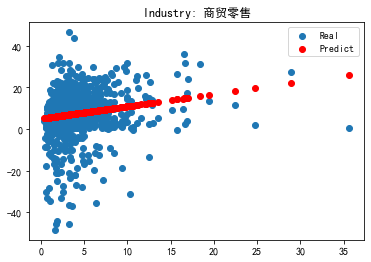

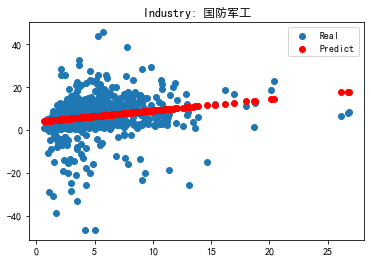

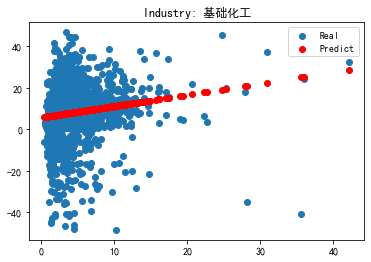

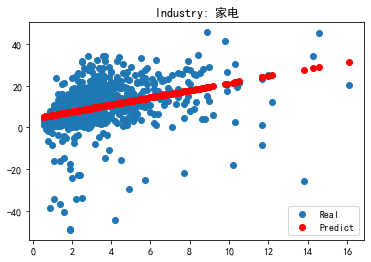

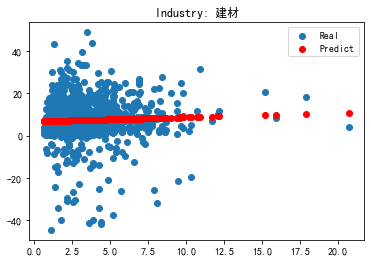

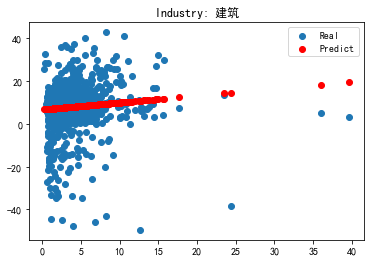

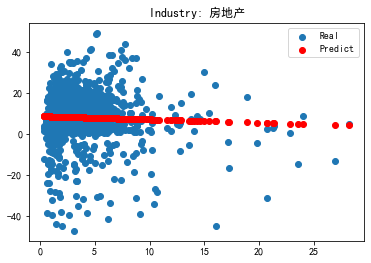

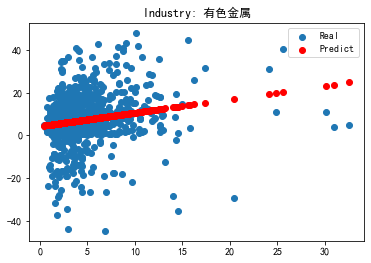

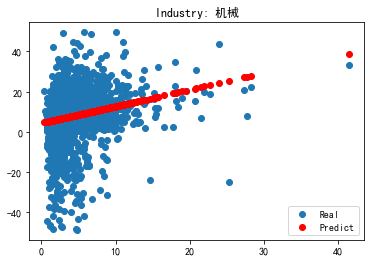

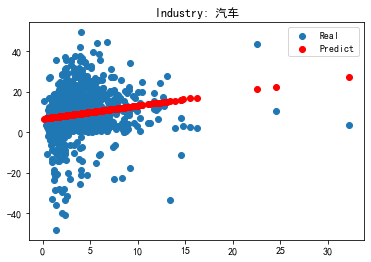

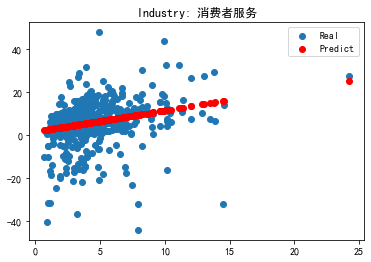

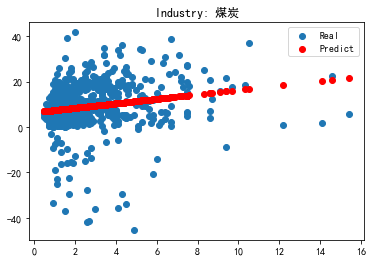

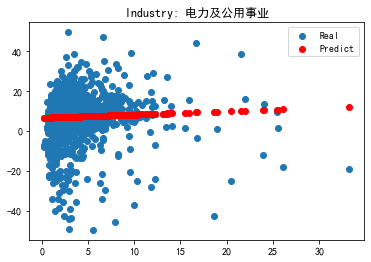

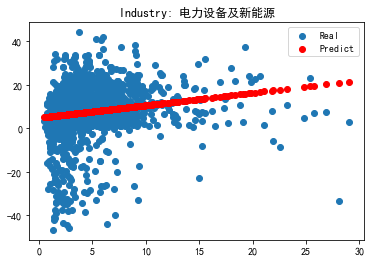

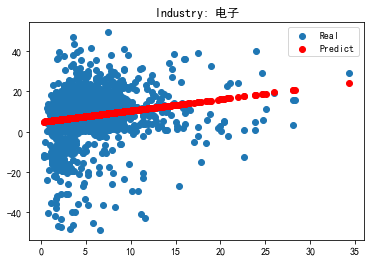

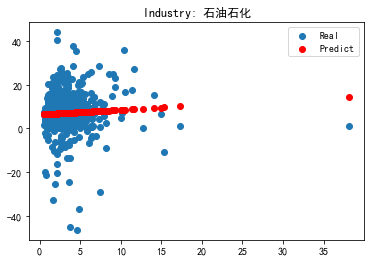

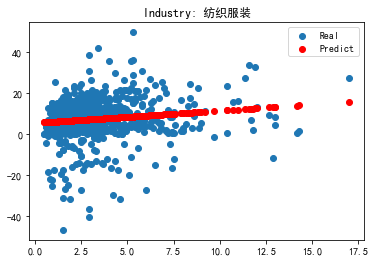

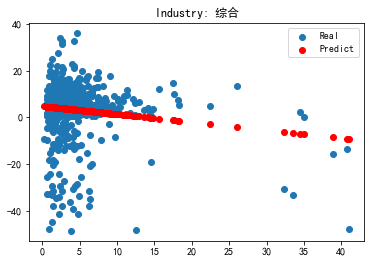

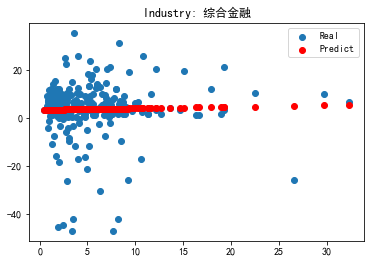

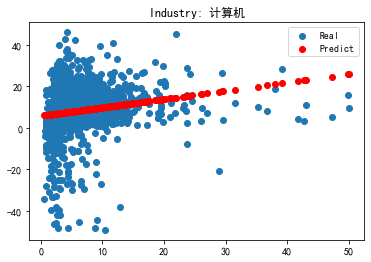

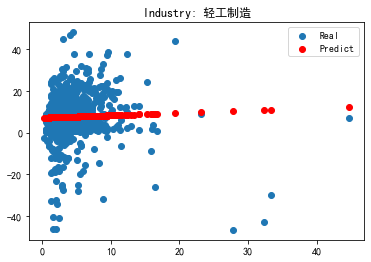

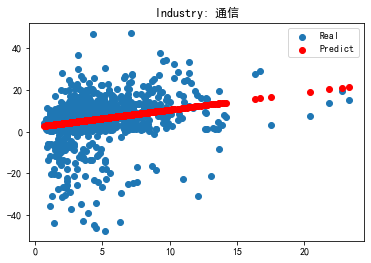

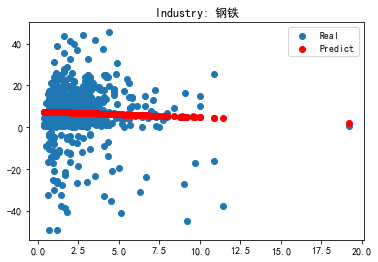

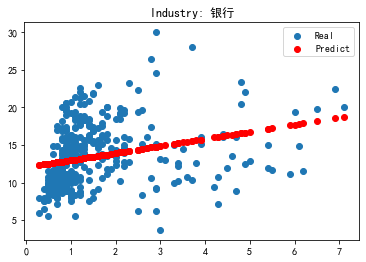

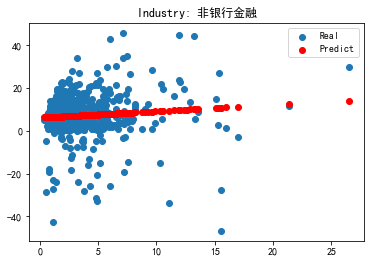

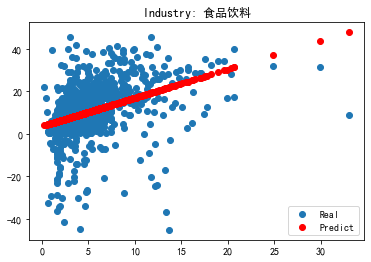

In [10]:
group_ind = df_.groupby('中信行业')
# RESULT2 为20年总数据对比
RESULT2 = {}
# 遍历分组对象
for industry in group_ind:
    name = industry[0]
    ind_data = industry[1]
    RTemp = []
    PTemp = []
    
    for Rname, Pname in zip(ROE,PB):
        RList = ind_data[Rname]
        PList = ind_data[Pname]

        for Rele,Pele in zip(RList,PList):
            if type(Rele) == type('Aa'):
                # 处理str
                Rele = float(Rele.replace(',', ''))
            if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
                RTemp.append(Rele)
                PTemp.append(Pele)  

    ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
    PB_train = np.array(PTemp).reshape((len(PTemp), 1))

    #新建一个线性回归模型，并把数据放进去对模型进行训练
    lineModel = LinearRegression()
    lineModel.fit(PB_train, ROE_train)

    #用训练后的模型，进行预测
    ROE_predict = lineModel.predict(PB_train)

    #coef_是系数，intercept_是截距
    a1 = lineModel.coef_[0][0]
    b = lineModel.intercept_[0]
    # print("y=%.4f*x+%.4f" % (a1,b))
    R2 = lineModel.score(PB_train, ROE_train)
    # print("correlation coefficient: %.4f"%(R2))
    TEMP = {"R2":R2,
            "Slope": a1,
            "Intercept": b}
    RESULT2[name] = TEMP
    
    y = RTemp
    x = PTemp
    plt.scatter(x, y, label='Real') # 散点图
    plt.scatter(x, ROE_predict, color = 'red', label='Predict')
    plt.title("Industry: %s"% name)
    plt.legend() # 显示图例，即每条线对应 label 中的内容
    plt.show() # 显示图形

<Figure size 432x288 with 0 Axes>

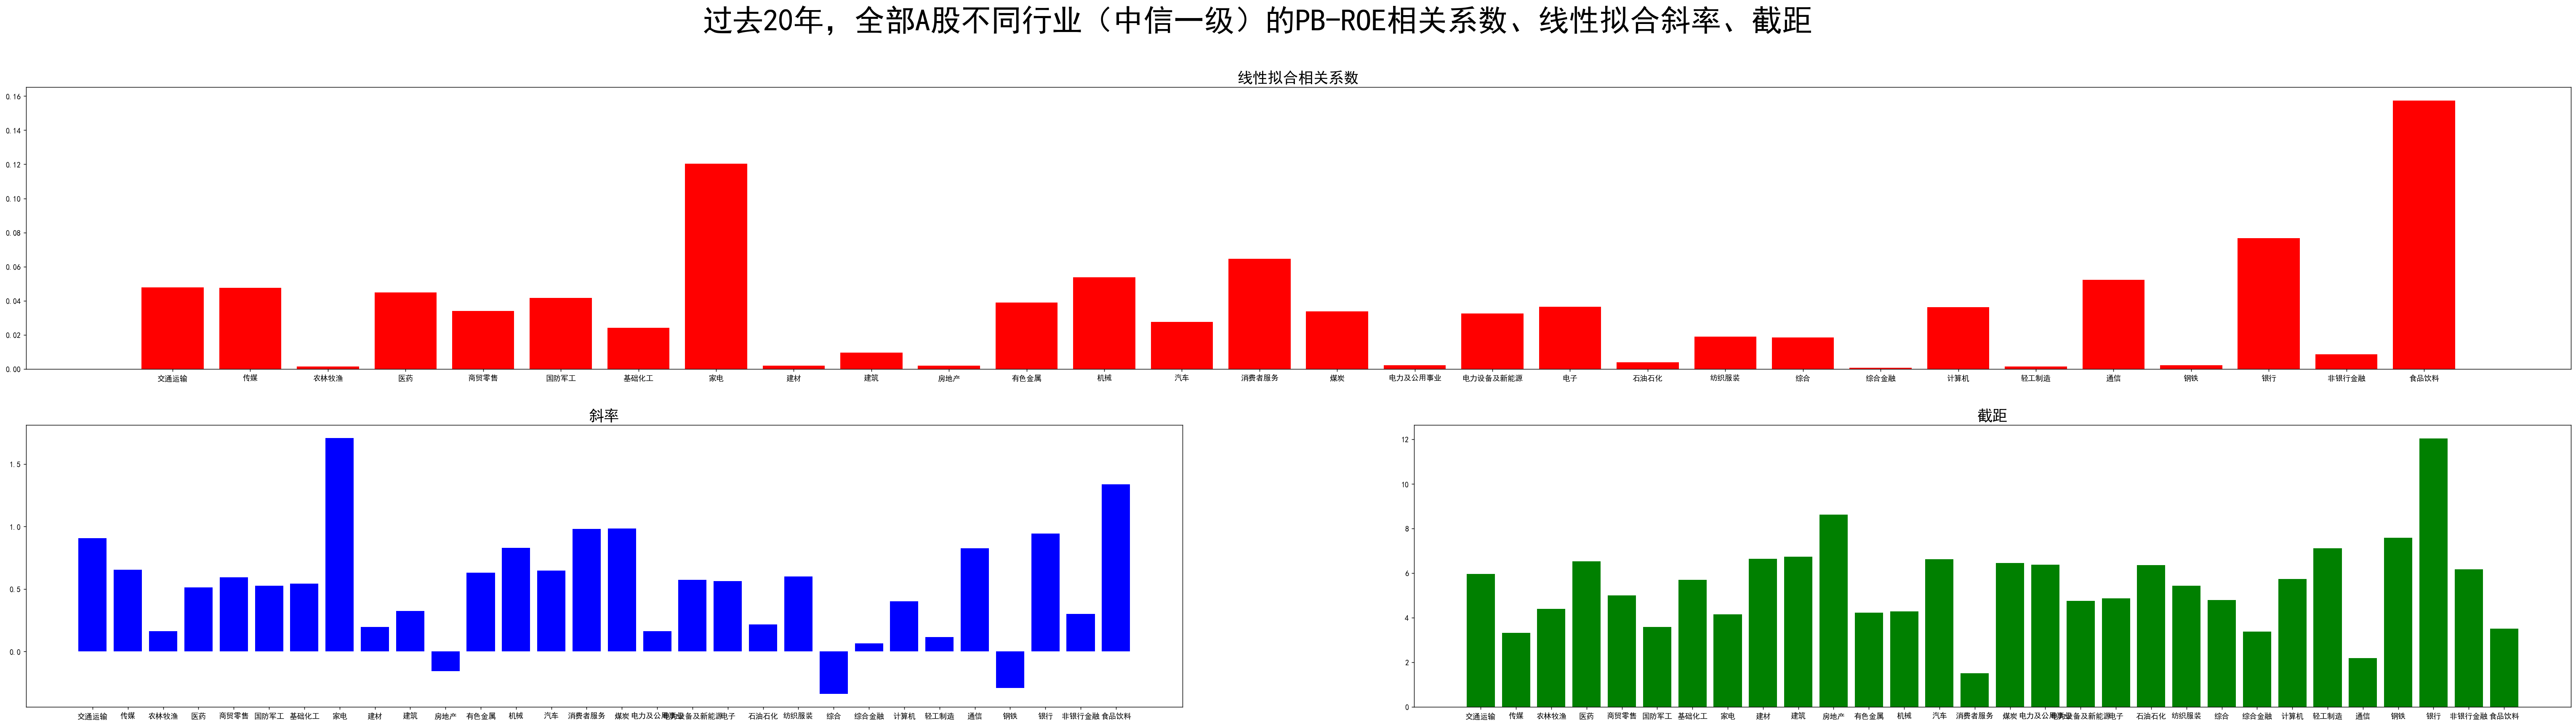

In [11]:
# RRR = pd.DataFrame(RESULT2).T
# RRR
# RRR.to_csv(path_or_buf='D:\JUPYTER_DEMO\ROE-PB\RESULT_2.csv')
Multiple_column_figure(RESULT2,"过去20年，全部A股不同行业（中信一级）的PB-ROE相关系数、线性拟合斜率、截距")

In [12]:
# 每个产业
for industry in group_ind:
    # RESULTXX 为每个产业20年内，每年的相关系数、线性拟合斜率、截距
    RESULTXX = {}
    name = industry[0]
    ind_data = industry[1]
    
    # 每年
    for Rname, Pname in zip(ROE,PB):
        RList = ind_data[Rname]
        PList = ind_data[Pname]
        Year = Rname[:4]
        RTemp = []
        PTemp = []
        
        # 每个要素
        for Rele,Pele in zip(RList,PList):
            if type(Rele) == type('Aa'):
                # 处理str
                Rele = float(Rele.replace(',', ''))
            if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
                RTemp.append(Rele)
                PTemp.append(Pele)  

        ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
        PB_train = np.array(PTemp).reshape((len(PTemp), 1))

        #新建一个线性回归模型，并把数据放进去对模型进行训练
        lineModel = LinearRegression()
        lineModel.fit(PB_train, ROE_train)

        #用训练后的模型，进行预测
        ROE_predict = lineModel.predict(PB_train)

        #coef_是系数，intercept_是截距
        a1 = lineModel.coef_[0][0]
        b = lineModel.intercept_[0]
        # print("y=%.4f*x+%.4f" % (a1,b))
        R2 = lineModel.score(PB_train, ROE_train)
        # print("correlation coefficient: %.4f"%(R2))
        
        TEMP = {"R2":R2,
            "Slope": a1,
            "Intercept": b}
        RESULTXX[Year] = TEMP
    
    output_name =  'D:\JUPYTER_DEMO\ROE-PB\RESULT_' + name + '.csv'
    RRR = pd.DataFrame(RESULTXX).T
    print(RRR)
    RRR.to_csv(path_or_buf = output_name)
        
        
        
#     TEMP = {"R2_mid": np.median(aa),
#             "Slope_mid": np.median(bb),
#             "Intercept_mid": np.median(RR)}
#     RESULT3[name] = TEMP

            R2     Slope  Intercept
2001  0.059204  0.860339   4.430470
2002  0.066313  1.319271   3.711976
2003  0.217072  2.078446   1.587884
2004  0.509770  4.081647  -0.537083
2005  0.183555  5.660667  -2.140091
2006  0.064812  1.156924   4.582317
2007  0.056182  1.367795   6.538887
2008  0.004895  0.547180   8.299345
2009  0.045999  1.093377   5.145236
2010  0.000002  0.003748  10.376180
2011  0.000050 -0.032588   8.974845
2012  0.111997  3.352621   2.738911
2013  0.097618  2.495803   2.734786
2014  0.019167  0.254942   7.063522
2015  0.009174  0.347875   5.662121
2016  0.287043  1.360952   4.292340
2017  0.122398  1.657838   5.308329
2018  0.275631  2.677942   3.273368
2019  0.117741  1.750274   5.040797
2020  0.002512  0.319217   4.738128
2021  0.007037  0.474942   6.047425
            R2     Slope  Intercept
2001  0.215687  0.544169   3.944738
2002  0.103521  0.927512   1.660852
2003  0.005278  0.416655   0.482243
2004  0.290638  3.376802  -4.334320
2005  0.000042  0.030808   1

            R2     Slope  Intercept
2001  0.021735 -1.061671   9.373593
2002  0.250927 -3.919978  20.765925
2003  0.063999  0.532994   7.223831
2004  0.113288 -2.185467  17.342778
2005  0.302568  5.161207   1.738592
2006  0.040750  1.019260   7.007791
2007  0.461127  2.063979  -0.034407
2008  0.003831  0.705236  13.534124
2009  0.023961 -0.532320  17.366460
2010  0.014364 -0.481592  18.060904
2011  0.043599  1.823086   8.768073
2012  0.000063  0.079465  10.906523
2013  0.012451  1.033643   3.812514
2014  0.053001 -1.716346   4.736973
2015  0.000730  0.374415  -6.200599
2016  0.026053  2.008652  -1.168071
2017  0.054500 -4.337298  14.344389
2018  0.169023  2.002971   7.398623
2019  0.013921  1.641486   6.106370
2020  0.206301 -6.410207  14.174697
2021  0.001367  0.409640  14.139647
            R2     Slope  Intercept
2001  0.006664 -0.226616   8.854511
2002  0.060832  1.159838   2.043675
2003  0.137478  1.729525   2.093057
2004  0.325572  6.164808  -3.536026
2005  0.023576  2.291377  -0

In [13]:
# RESULT3 为20年中值对比
RESULT3 = {}
# 每个产业
for industry in group_ind:
    name = industry[0]
    ind_data = industry[1]
    aa = []   # 斜率列
    bb = []   # 截距列
    RR = []   # 系数列
    
    # 每年
    for Rname, Pname in zip(ROE,PB):
        RList = ind_data[Rname]
        PList = ind_data[Pname]
        Year = Rname[:4]
        RTemp = []
        PTemp = []
        
        # 每个要素
        for Rele,Pele in zip(RList,PList):
            if type(Rele) == type('Aa'):
                # 处理str
                Rele = float(Rele.replace(',', ''))
            if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
                RTemp.append(Rele)
                PTemp.append(Pele)  

        ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
        PB_train = np.array(PTemp).reshape((len(PTemp), 1))

        #新建一个线性回归模型，并把数据放进去对模型进行训练
        lineModel = LinearRegression()
        lineModel.fit(PB_train, ROE_train)

        #用训练后的模型，进行预测
        ROE_predict = lineModel.predict(PB_train)

        #coef_是系数，intercept_是截距
        a1 = lineModel.coef_[0][0]
        b = lineModel.intercept_[0]
        # print("y=%.4f*x+%.4f" % (a1,b))
        R2 = lineModel.score(PB_train, ROE_train)
        # print("correlation coefficient: %.4f"%(R2))
        aa.append(a1)
        bb.append(b)
        RR.append(R2)
        
    TEMP = {"R2_mid": np.median(aa),
            "Slope_mid": np.median(bb),
            "Intercept_mid": np.median(RR)}
    RESULT3[name] = TEMP

<Figure size 432x288 with 0 Axes>

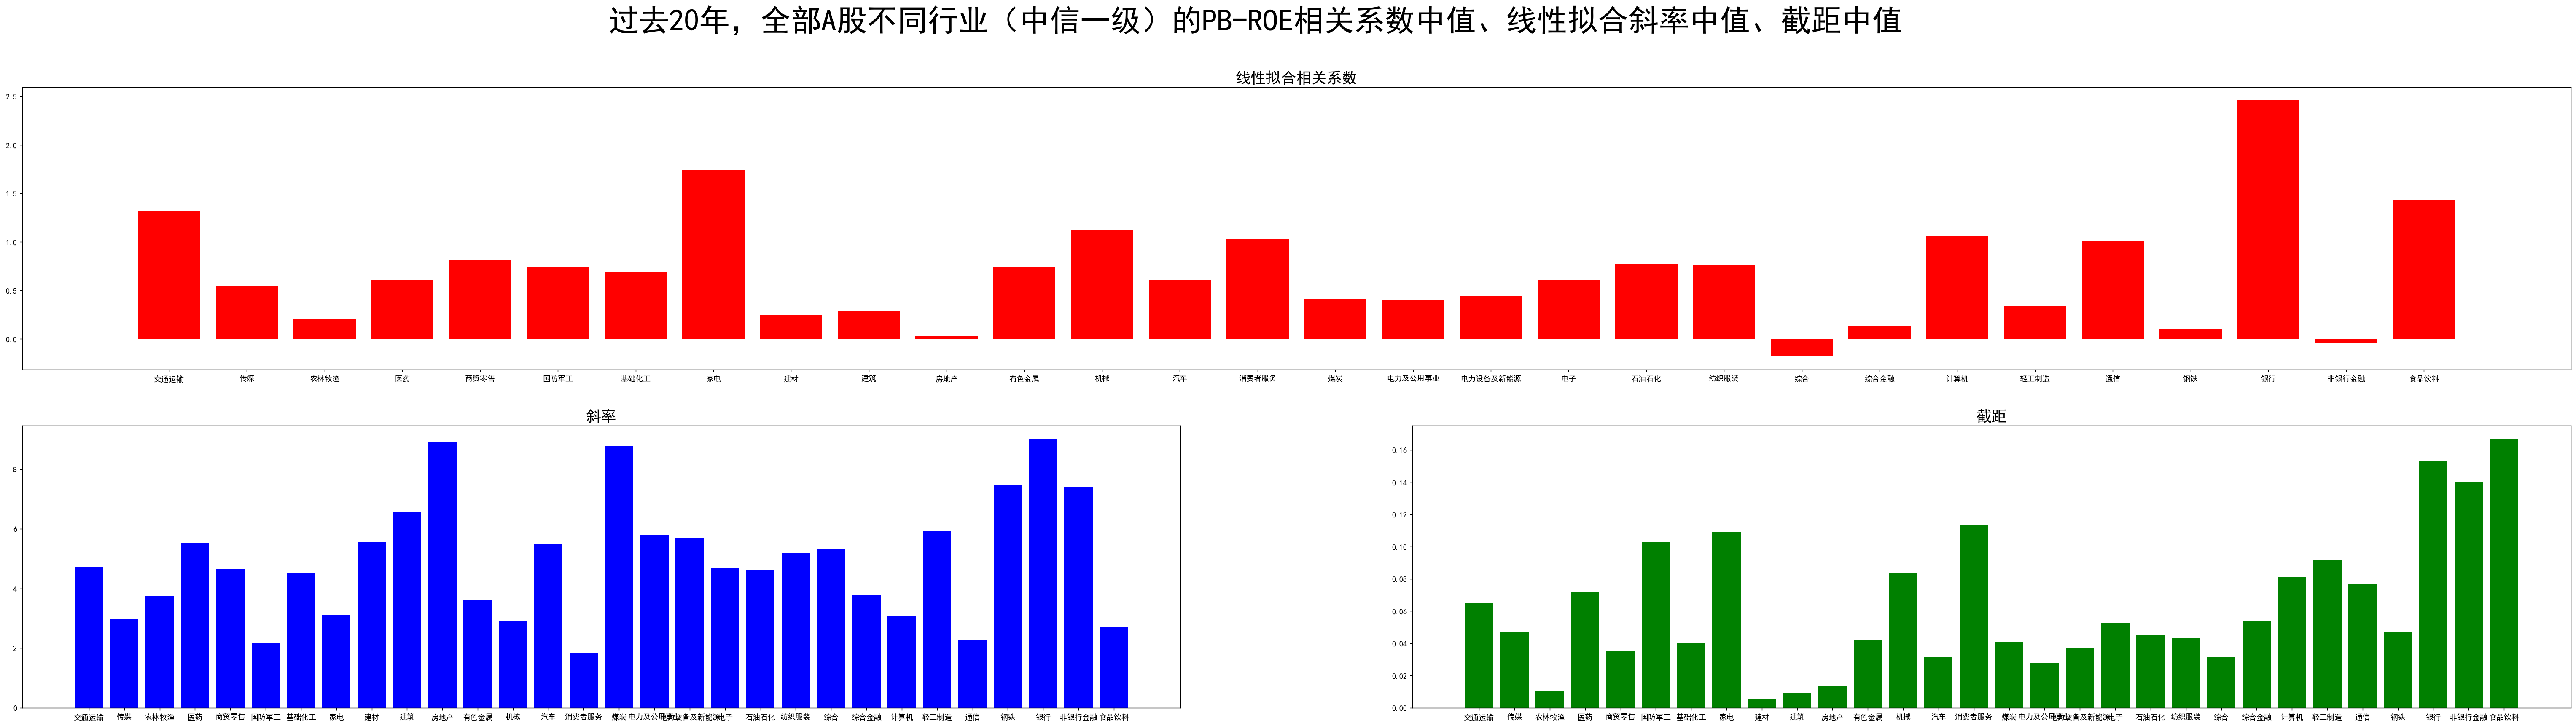

In [14]:
# RESULT3
# RRR = pd.DataFrame(RESULT3).T
# RRR
# RRR.to_csv(path_or_buf='D:\JUPYTER_DEMO\ROE-PB\RESULT_3.csv')
Multiple_column_figure(RESULT3,"过去20年，全部A股不同行业（中信一级）的PB-ROE相关系数中值、线性拟合斜率中值、截距中值")

### <font face="楷体">3. 按年度统计，过去20年，基础化工、石油石化行业的PB-ROE线性拟合相关系数、斜率和截距。</font>

In [15]:
#df_.groupby('中信行业')
BS = df_[df_['中信行业'] == '基础化工']   # Basic  Chemistry
PP = df_[df_['中信行业'] == '石油石化'] # Petroleum and petrochemical

In [16]:
# 基础化工PB-ROE线性拟合相关系数、斜率和截距。
RESULT_BS = {}
for Rname, Pname in zip(ROE,PB):
    RList = BS[Rname]
    PList = BS[Pname]
    Year = Rname[:4]
    RTemp = []
    PTemp = []
    
    for Rele,Pele in zip(RList,PList):
        if type(Rele) == type('Aa'):
            # 处理str
            Rele = float(Rele.replace(',', ''))
        if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
            RTemp.append(Rele)
            PTemp.append(Pele)              
    
    ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
    PB_train = np.array(PTemp).reshape((len(PTemp), 1))

    #新建一个线性回归模型，并把数据放进去对模型进行训练
    lineModel = LinearRegression()
    lineModel.fit(PB_train, ROE_train)
    
    #用训练后的模型，进行预测
    ROE_predict = lineModel.predict(PB_train)
    
    #coef_是系数，intercept_是截距
    a1 = lineModel.coef_[0][0]
    b = lineModel.intercept_[0]
    # print("y=%.4f*x+%.4f" % (a1,b))
    R2 = lineModel.score(PB_train, ROE_train)
    #pccs = np.corrcoef(ROE_train, PB_train)
    # print("correlation coefficient: %.4f"%(R2))
    TEMP = {"R2":R2,
            "Slope": a1,
            "Intercept": b}
    RESULT_BS[Year] = TEMP

<Figure size 432x288 with 0 Axes>

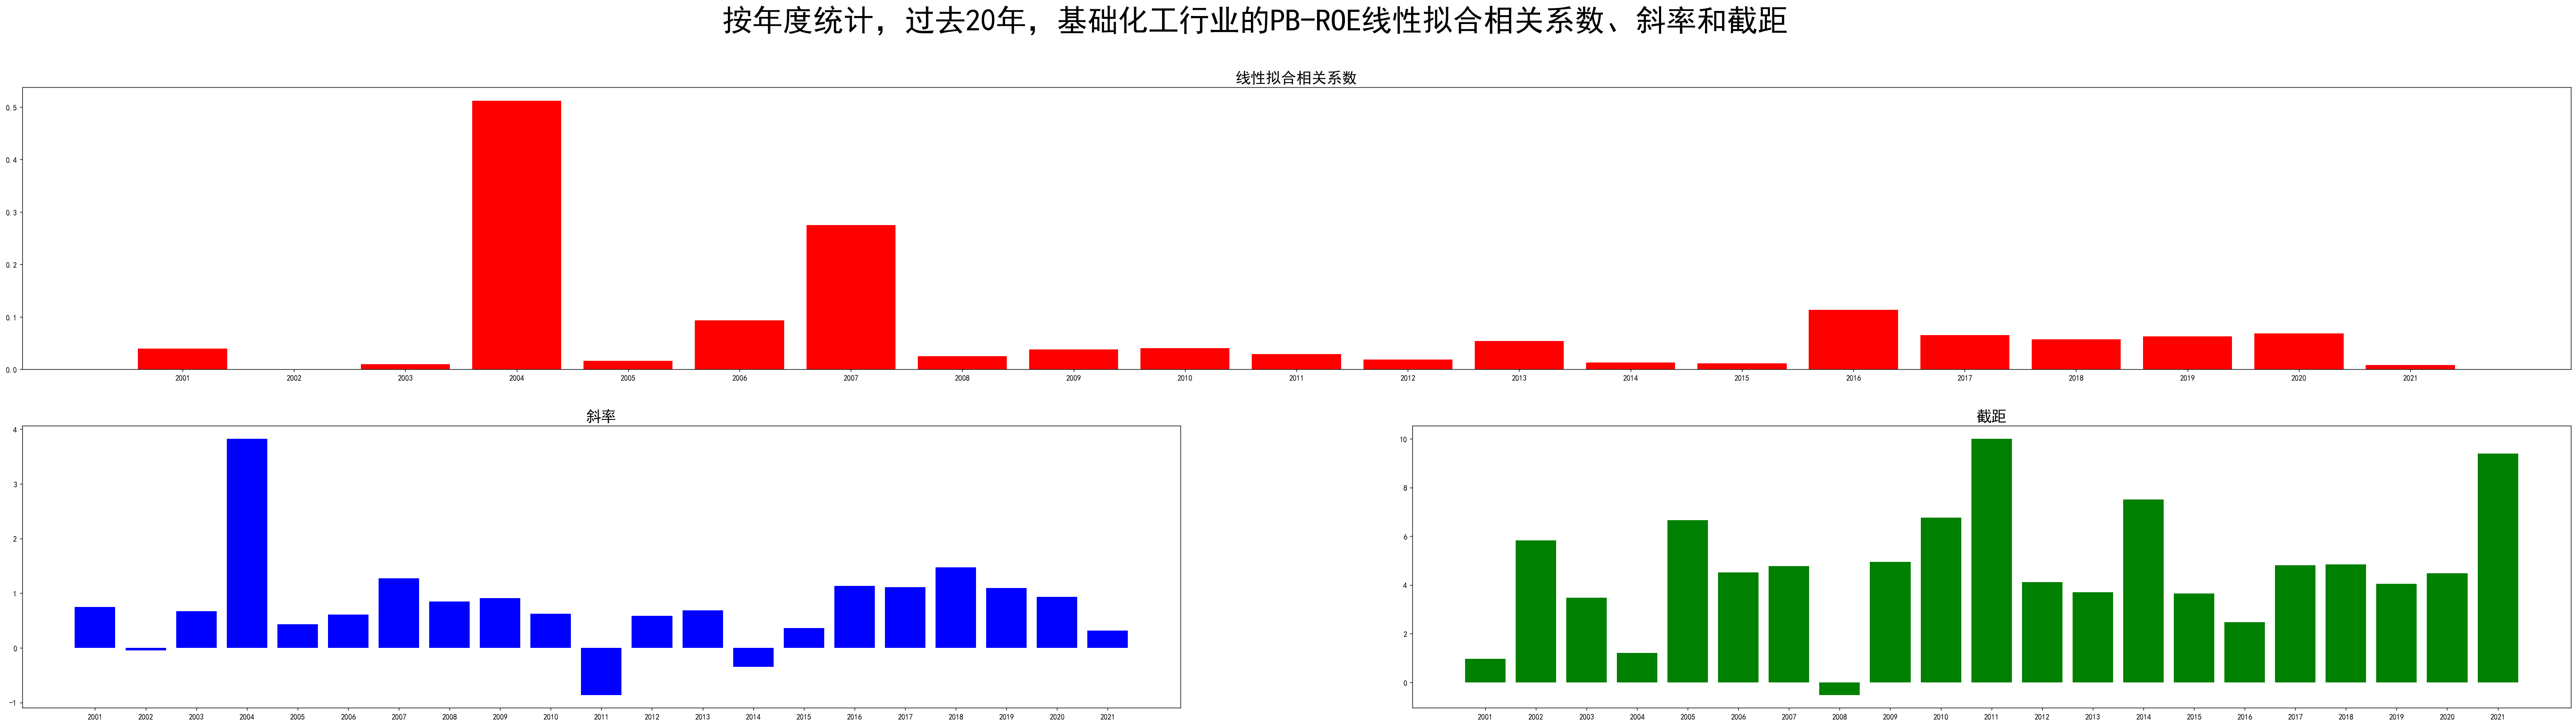

In [17]:
# RESULT_BS 
# RRR = pd.DataFrame(RESULT_BS).T
# RRR
# RRR.to_csv(path_or_buf='D:\JUPYTER_DEMO\ROE-PB\RESULT_BS.csv')
Multiple_column_figure(RESULT_BS,"按年度统计，过去20年，基础化工行业的PB-ROE线性拟合相关系数、斜率和截距")

In [18]:
# 石油石化PB-ROE线性拟合相关系数、斜率和截距。
RESULT_PP = {}
for Rname, Pname in zip(ROE,PB):
    RList = PP[Rname]
    PList = PP[Pname]
    Year = Rname[:4]
    RTemp = []
    PTemp = []
    
    for Rele,Pele in zip(RList,PList):
        if type(Rele) == type('Aa'):
            # 处理str
            Rele = float(Rele.replace(',', ''))
        if not math.isnan(Rele) and not math.isnan(float(Pele)) and -50 <= Rele <= 50:
            RTemp.append(Rele)
            PTemp.append(Pele)              
    
    ROE_train = np.array(RTemp).reshape((len(RTemp), 1))
    PB_train = np.array(PTemp).reshape((len(PTemp), 1))

    #新建一个线性回归模型，并把数据放进去对模型进行训练
    lineModel = LinearRegression()
    lineModel.fit(PB_train, ROE_train)
    
    #用训练后的模型，进行预测
    ROE_predict = lineModel.predict(PB_train)
    
    #coef_是系数，intercept_是截距
    a1 = lineModel.coef_[0][0]
    b = lineModel.intercept_[0]
    # print("y=%.4f*x+%.4f" % (a1,b))
    R2 = lineModel.score(PB_train, ROE_train)
    #pccs = np.corrcoef(ROE_train, PB_train)
    # print("correlation coefficient: %.4f"%(R2))
    TEMP = {"R2":R2,
            "Slope": a1,
            "Intercept": b}
    RESULT_PP[Year] = TEMP

<Figure size 432x288 with 0 Axes>

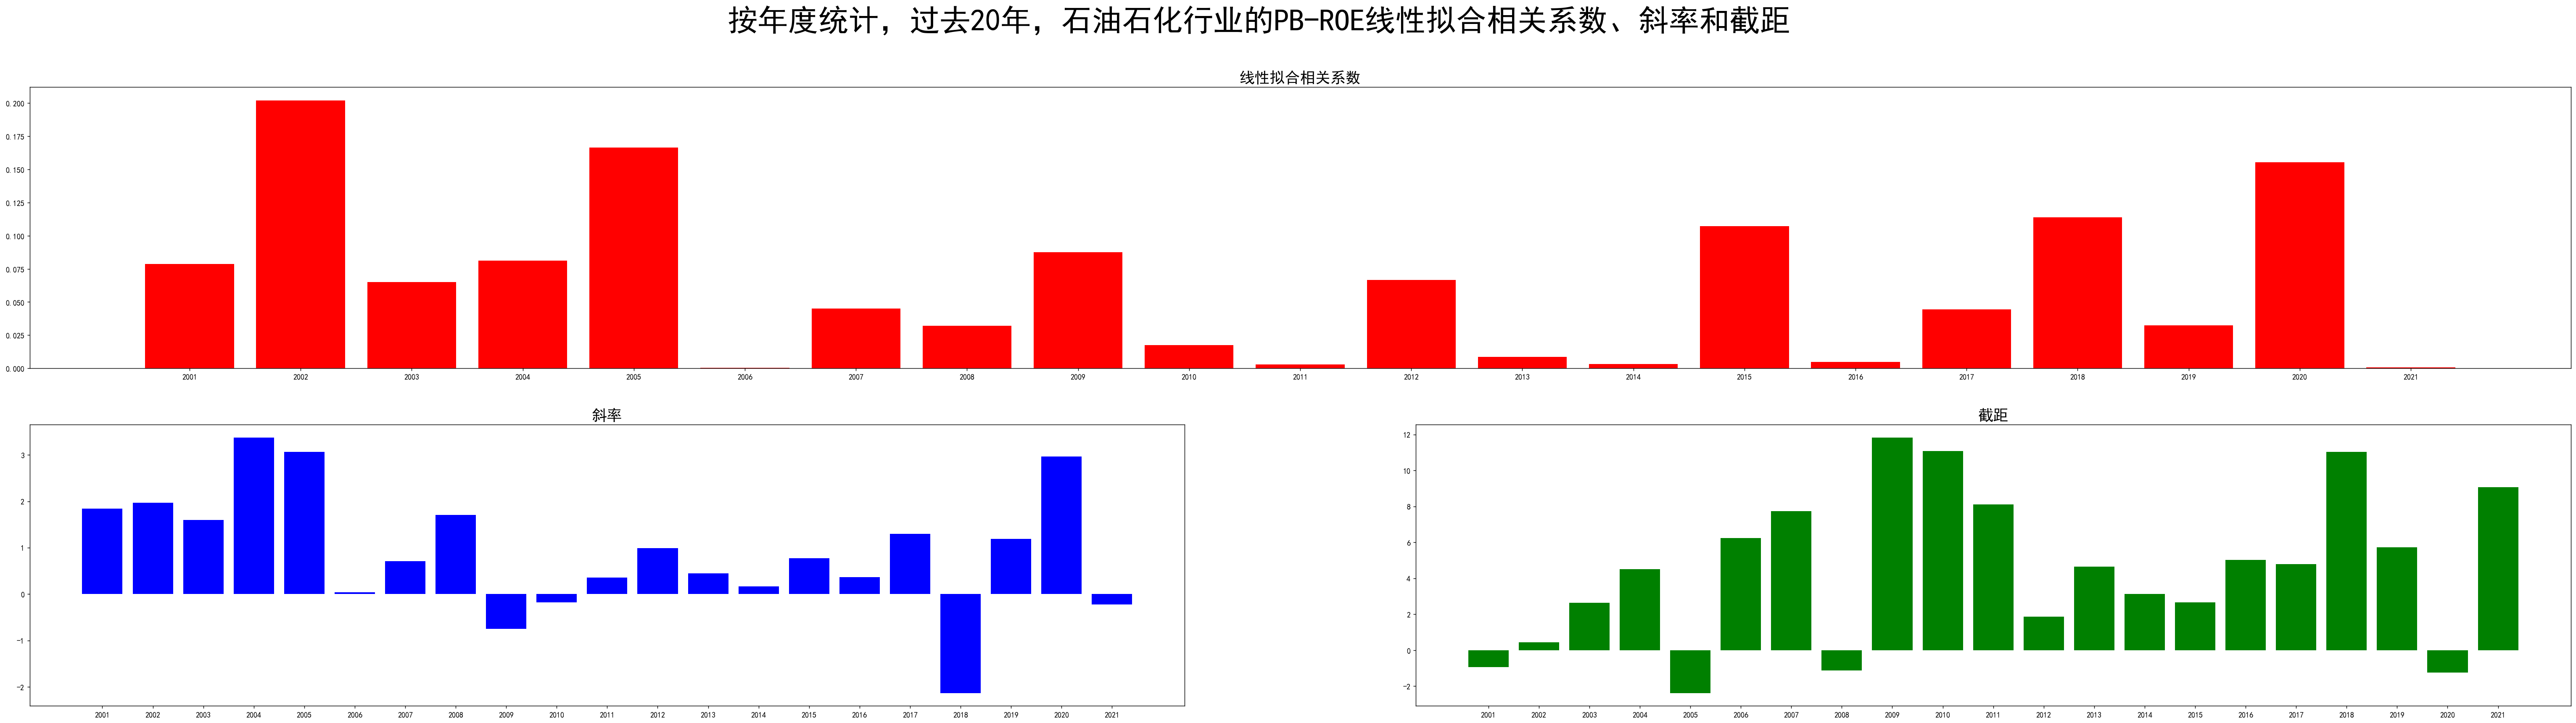

In [19]:
# RESULT_PP
# RRR = pd.DataFrame(RESULT_PP).T
# RRR
# RRR.to_csv(path_or_buf='D:\JUPYTER_DEMO\ROE-PB\RESULT_PP.csv')
Multiple_column_figure(RESULT_PP,"按年度统计，过去20年，石油石化行业的PB-ROE线性拟合相关系数、斜率和截距")